In [1]:
import svjflatanalysis
import numpy as np
from time import strftime
import os
import os.path as osp
import imp, importlib
import mplhep
import seutils

import matplotlib.pyplot as plt
import numpy as np
import coffea

   INFO:2020-12-21 14:24:42:__init__:32 Using tqdm notebook


triggerpath /Users/saranabili/BSVJ/tuples/BKG/Dec18


In [2]:
qcd = svjflatanalysis.samples.init_bkgs_triggered(category='qcd', max_entries=30, branches='*', treename='PreSelection')
#qcd = svjflatanalysis.samples.init_bkgs_triggered(category='qcd', max_entries=20, branches='*', treename='TreeMaker2/PreSelection')

   INFO:2020-12-21 14:24:46:samples:291 Loading /Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_800to1000_TuneCP5_13TeV_pythia8_ext1.root


path /Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.*
bkg_rootfiles ['/Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_800to1000_TuneCP5_13TeV_pythia8_ext1.root', '/Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_300to470_TuneCP5_13TeV_pythia8.root', '/Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8.root', '/Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8.root', '/Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_470to600_TuneCP5_13TeV_pythia8.root', '/Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8.root', '/Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8.root', '/Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_600to800_TuneCP5_13TeV_pythia8.root']
category qcd


   INFO:2020-12-21 14:24:47:dataset:211 Cached ~468.5 kb (30 entries, 350 branches) for <svjflatanalysis.dataset.BackgroundDataset qcd (1 root files) object at 0x10ea298b0>
   INFO:2020-12-21 14:24:47:samples:291 Loading /Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_300to470_TuneCP5_13TeV_pythia8.root
   INFO:2020-12-21 14:24:47:dataset:211 Cached ~450.5 kb (30 entries, 350 branches) for <svjflatanalysis.dataset.BackgroundDataset qcd (1 root files) object at 0x1452447c0>
   INFO:2020-12-21 14:24:47:samples:291 Loading /Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8.root
   INFO:2020-12-21 14:24:47:dataset:211 Cached ~458.2 kb (30 entries, 350 branches) for <svjflatanalysis.dataset.BackgroundDataset qcd (1 root files) object at 0x145326f70>
   INFO:2020-12-21 14:24:47:samples:291 Loading /Users/saranabili/BSVJ/tuples/BKG/Dec18/Autumn18.QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8.root
   INFO:2020-12-21 14:24:48:dataset:211 Cached ~462.4 kb 

In [75]:
print(qcd[2].name)

Autumn18.QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8


In [76]:
arrays = qcd[2].cache[0]
#print("arrays: ",arrays)
#arrays = qcd[0].cache

In [77]:
arrays[b'GenParticles_PdgId'][0]
#arrays[b'GenParticles_PdgId'][]

array([2212, 2212,   21,   21,    3,   -4,  111,  111, -411,    4,  421,
       2212,    2,   -3,  111,  111,  310,  111, 2212,  111,  111,  111,
        310,  310, -321, -311, -321,  211,  111,  111,   11,  -11],
      dtype=int32)

In [78]:
event = {k : v[2] for k, v in arrays.items()}
#print("event",event)
print("particles pdgId: ",event[b'GenParticles_PdgId'])
print("particles status: ",event[b'GenParticles_Status'][np.abs(event[b'GenParticles_PdgId'])>=0])
print("particles pdgId with status == 1 : ",event[b'GenParticles_PdgId'][event[b'GenParticles_Status']==1])

particles pdgId:  [2212 2212    2    2    2    2   -4   -2 2212    1   -3    2 2212    4
   -3  421    2  111  221    1   -3 2212 2212    2   -1  221 2212    2
 2212 2212  111 2212  111  111  111  310 2212  310 -421  111  111  111
  111  130  310  111  111   11  -11   11  -11 -211  211 -311  111   11
  -11   11  -11  310]
particles status:  [ 4  4 21 21 23 23 71 71  1 71 71 71  1 71 71  2 71  2  2 71 71  1  1 71
 71  2  1 71  1  1  2  1  2  2  2  1  1  1  2  2  2  2  2  1  1  2  2  1
  1  1  1  1  1  2  2  1  1  1  1  1]
particles pdgId with status == 1 :  [2212 2212 2212 2212 2212 2212 2212 2212  310 2212  310  130  310   11
  -11   11  -11 -211  211   11  -11   11  -11  310]


/Users/saranabili/BSVJ/svjflatanalysis/svjflatanalysis/utils.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**kwargs)


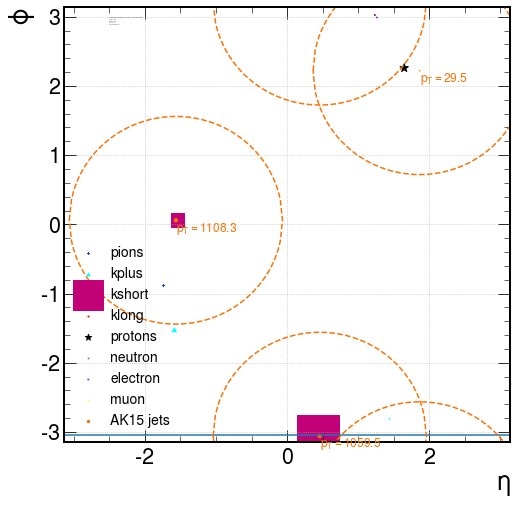

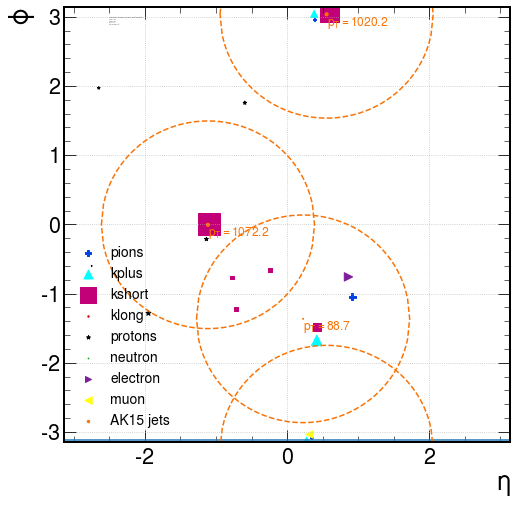

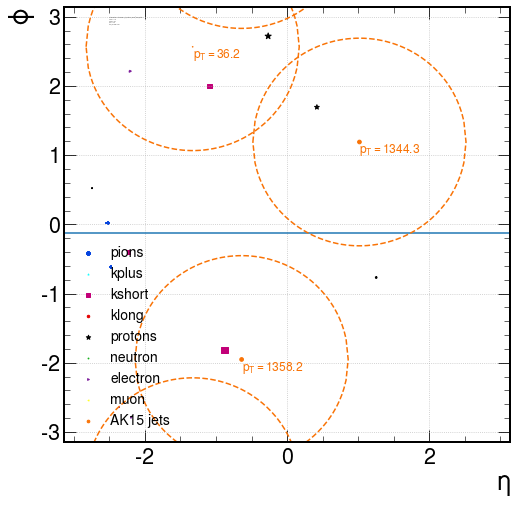

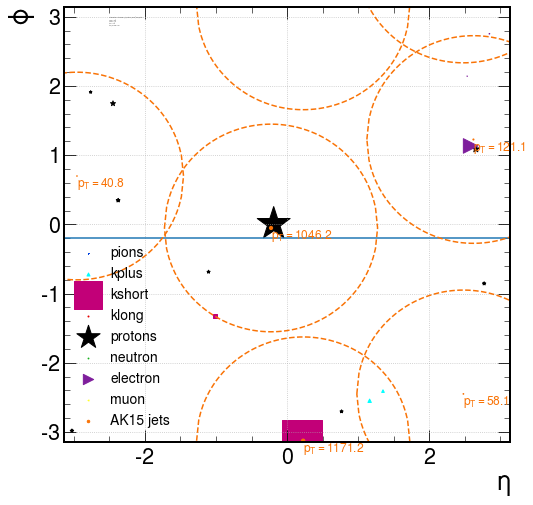

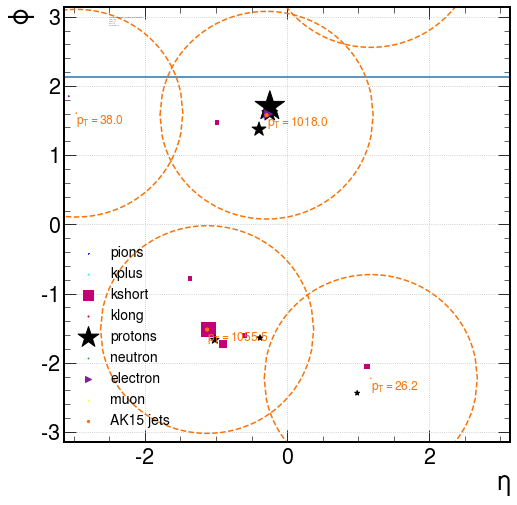

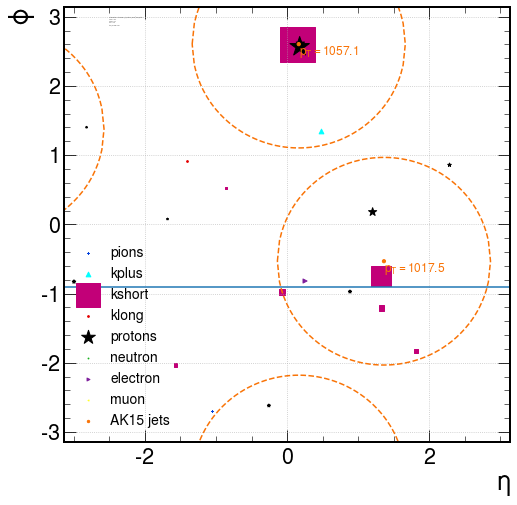

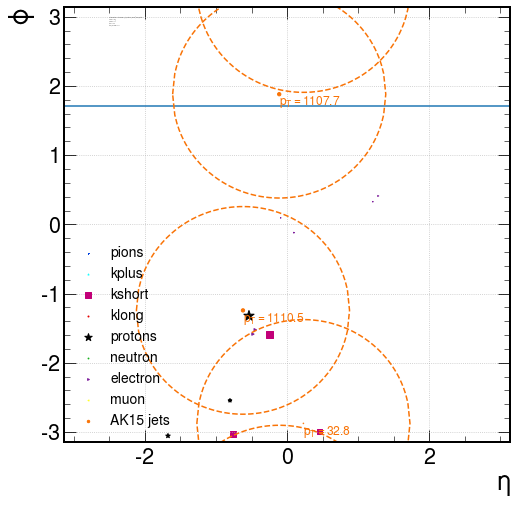

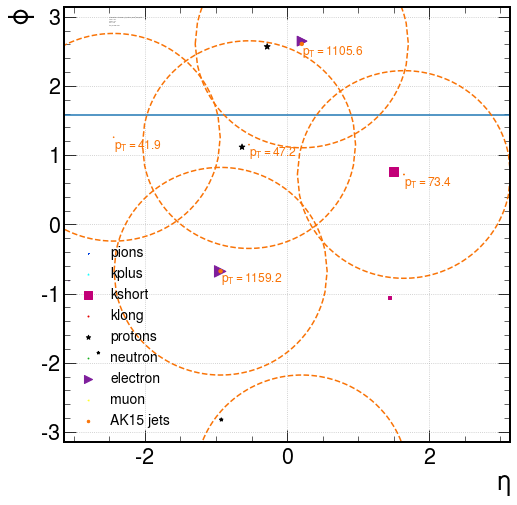

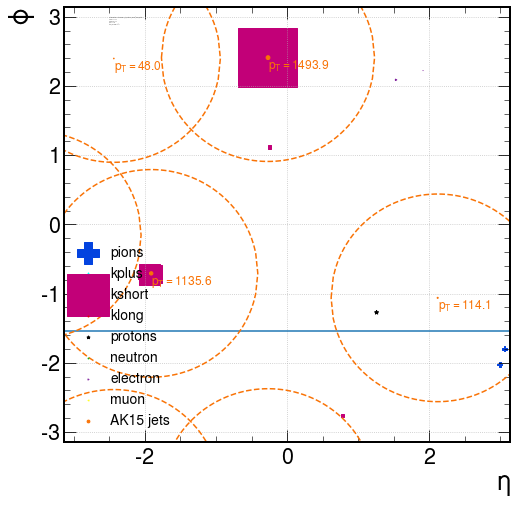

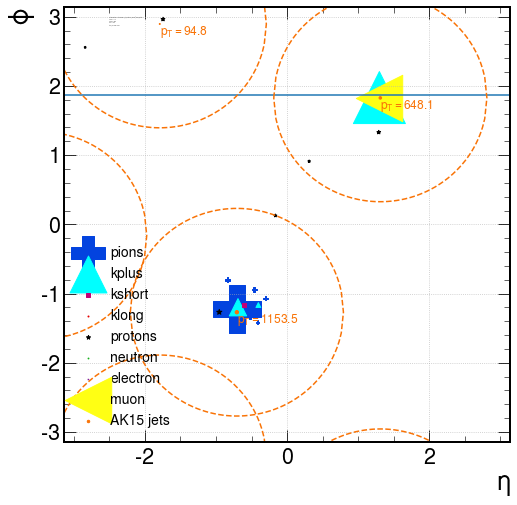

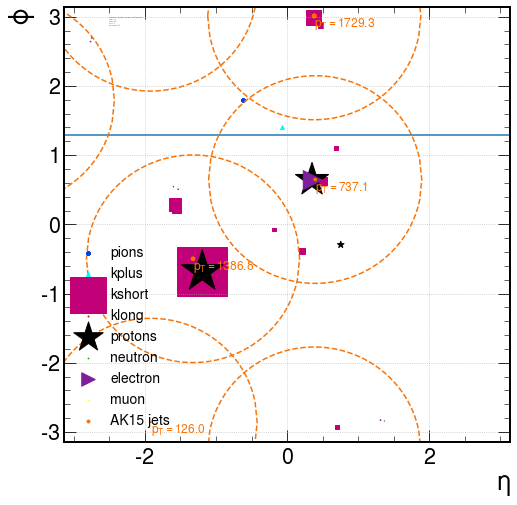

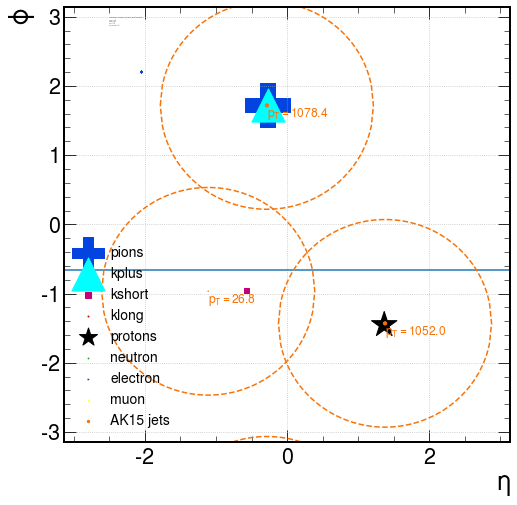

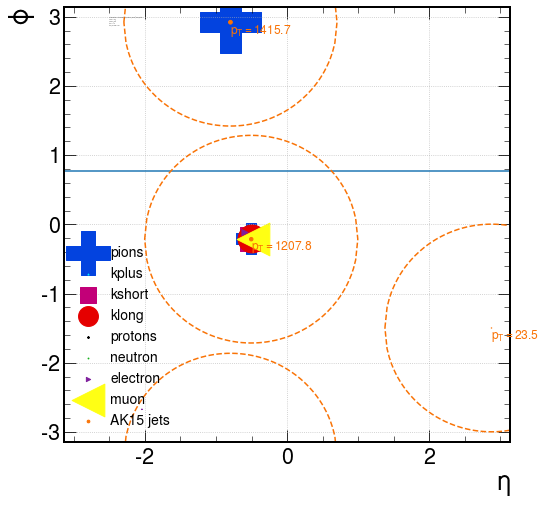

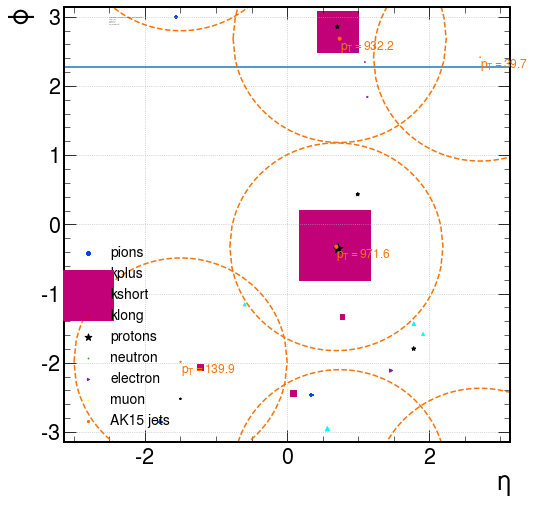

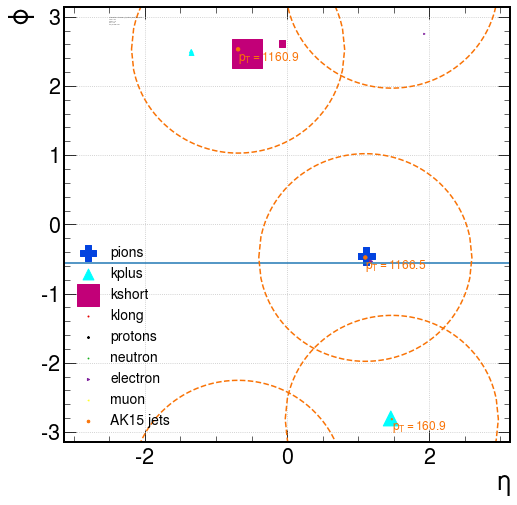

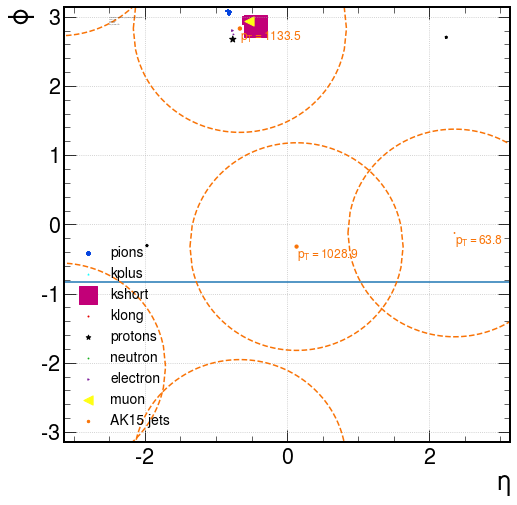

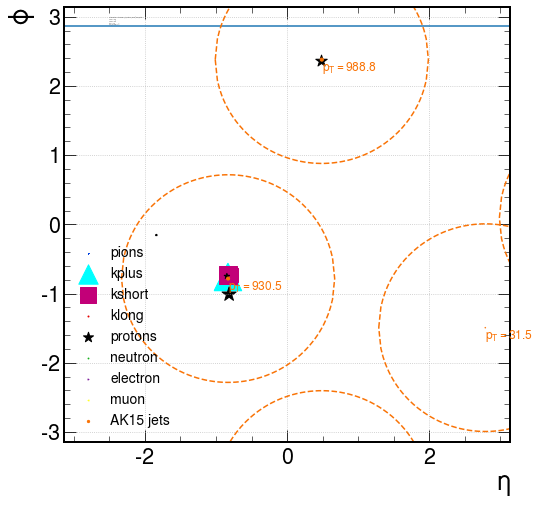

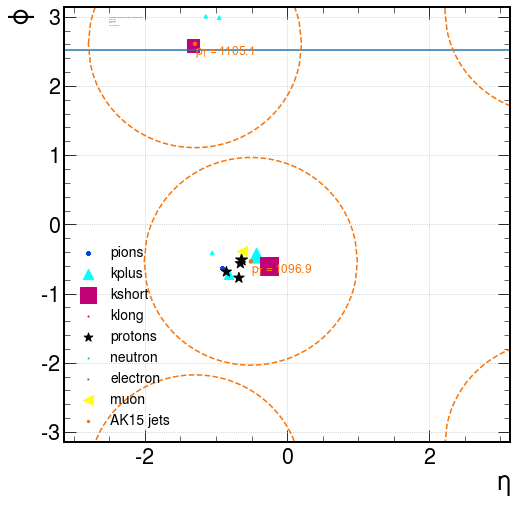

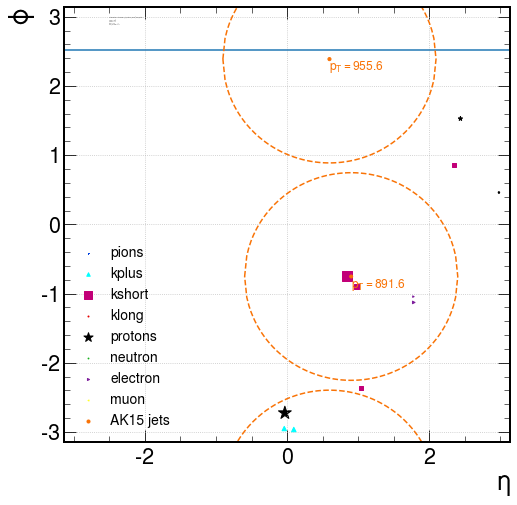

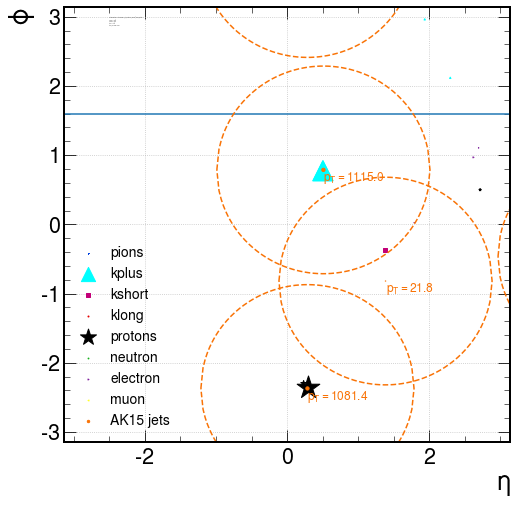

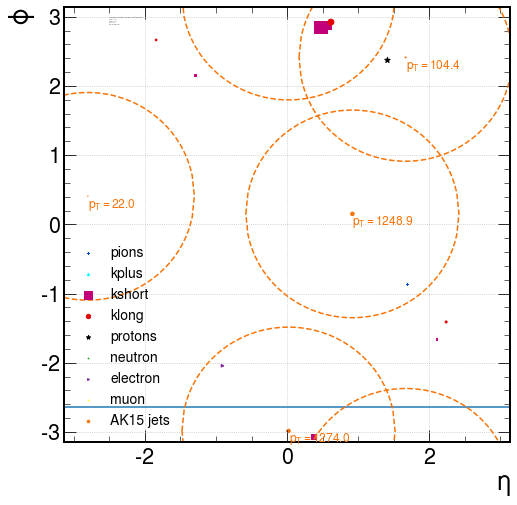

In [81]:
importlib.reload(svjflatanalysis.arrayutils)
importlib.reload(svjflatanalysis.dataset)
from math import pi
import time

def shift(jets, eta, phi):
    """
    Shifts a jets.eta and jets.phi by eta and phi
    """
    jets.eta = jets.eta - eta
    jets.phi = jets.phi - phi
    # Some normalization of phi - first substract whole 2*pi's
    jets.phi[jets.phi > 2.*pi] -= 2.*pi
    jets.phi[jets.phi < -2.*pi] += 2.*pi
    # Then flip to -pi < phi < pi regime
    jets.phi[jets.phi > pi] -= 2.*pi
    jets.phi[jets.phi < -pi] += 2.*pi

def get_dr_ring(dr, n_points=100):        
    deta = np.linspace(-dr, dr, n_points)
    dphi = np.sqrt(dr**2 - np.square(deta))
    deta = np.concatenate((deta, deta[::-1]))
    dphi = np.concatenate((dphi, -dphi[::-1]))
    return deta, dphi
    
def plot(event, ax=None, i=0, save=False):
    if ax is None: ax = svjflatanalysis.utils.get_ax()
     
    
    subleading_ak15_jet = svjflatanalysis.arrayutils.Jets(b'JetsAK15_subleading', event, has_subjets=True, has_preprocessed_subjets=True)
    
    select_proton = (np.abs(event[b'GenParticles_PdgId']) == 2212) & (np.abs(event[b'GenParticles_Status']) == 1)
    proton = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'proton',
        event[b'GenParticles.fCoordinates.fPt'][select_proton].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_proton].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_proton].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_proton].flatten()
        )
    ax.plot([-pi,pi],[event[b'METPhi'],event[b'METPhi']])
    
    select_neutron = (np.abs(event[b'GenParticles_PdgId']) == 2112) & (np.abs(event[b'GenParticles_Status']) == 1)
    neutron = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'proton',
        event[b'GenParticles.fCoordinates.fPt'][select_neutron].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_neutron].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_neutron].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_neutron].flatten()
        )
    
    select_pions = (np.abs(event[b'GenParticles_PdgId']) == 211) & (np.abs(event[b'GenParticles_Status']) == 1)
    pions = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'pions',
        event[b'GenParticles.fCoordinates.fPt'][select_pions].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_pions].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_pions].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_pions].flatten()
        )
    #shift(pions, subleading_ak15_jet.eta, subleading_ak15_jet.phi)
    #print("pions eta and phi",pions.eta, pions.phi)
    

    select_kshort = (np.abs(event[b'GenParticles_PdgId']) == 310) & (np.abs(event[b'GenParticles_Status']) == 1)
    kshort = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'kshort',
        event[b'GenParticles.fCoordinates.fPt'][select_kshort].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_kshort].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_kshort].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_kshort].flatten()
        )
    
    select_klong = (np.abs(event[b'GenParticles_PdgId']) == 130) & (np.abs(event[b'GenParticles_Status']) == 1)
    klong = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'kshort',
        event[b'GenParticles.fCoordinates.fPt'][select_klong].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_klong].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_klong].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_klong].flatten()
        )
    #shift(kshort, subleading_ak15_jet.eta, subleading_ak15_jet.phi)
    
    select_kplus = (np.abs(event[b'GenParticles_PdgId']) == 321) & (np.abs(event[b'GenParticles_Status']) == 1)
    kplus = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'kplus',
        event[b'GenParticles.fCoordinates.fPt'][select_kplus].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_kplus].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_kplus].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_kplus].flatten()
        )
    #shift(kplus, subleading_ak15_jet.eta, subleading_ak15_jet.phi)
    #print("kshort eta and phi",kshort.eta, kshort.phi)
    
    select_electron = (np.abs(event[b'GenParticles_PdgId']) == 11) & (np.abs(event[b'GenParticles_Status']) == 1)
    electron = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'electron',
        event[b'GenParticles.fCoordinates.fPt'][select_electron].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_electron].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_electron].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_electron].flatten()
        )
    
    select_muon = (np.abs(event[b'GenParticles_PdgId']) == 13) & (np.abs(event[b'GenParticles_Status']) == 1)
    muon = svjflatanalysis.arrayutils.Jets.from_ptetaphie(
        b'electron',
        event[b'GenParticles.fCoordinates.fPt'][select_muon].flatten(),
        event[b'GenParticles.fCoordinates.fEta'][select_muon].flatten(),
        event[b'GenParticles.fCoordinates.fPhi'][select_muon].flatten(),
        event[b'GenParticles.fCoordinates.fE'][select_muon].flatten()
        )
    
    ak15_jets = svjflatanalysis.arrayutils.Jets(b'JetsAK15', event, has_subjets=False)
    #shift(ak15_jets, subleading_ak15_jet.eta, subleading_ak15_jet.phi)
    #print("ak15_jets eta and phi",ak15_jets.eta, ak15_jets.phi)
    
    ecfN2b2 = np.array(arrays[b'JetsAK15_subleading_ecfN2b2'][i].flatten())
    ecfN2b1 = np.array(arrays[b'JetsAK15_subleading_ecfN2b1'][i].flatten())
    tau21= np.array(arrays[b'JetsAK15_subleading_NsubjettinessTau2'][i].flatten()) / np.array(arrays[b'JetsAK15_subleading_NsubjettinessTau1'][i].flatten())
    omega = np.array(arrays[b'JetsAK15_subleading_softDropMass'][i])/(subleading_ak15_jet.pt**2+event[b'METPhi']**2)**0.5
    tau21_DDTnew = tau21-0.75*omega
    

    ax.scatter(pions.eta, pions.phi, color='xkcd:blue', s=pions.pt*10, label='pions', marker='P')
    ax.scatter(kplus.eta, kplus.phi, color='xkcd:cyan', s=kplus.pt*10, label='kplus', marker='^')
    ax.scatter(kshort.eta, kshort.phi, color='xkcd:magenta', s=kshort.pt*10, label='kshort', marker='s')
    ax.scatter(klong.eta, klong.phi, color='xkcd:red', s=klong.pt*10, label='klong', marker='o')
    ax.scatter(proton.eta, proton.phi, color='xkcd:black', s=proton.pt*10, label='protons', marker='*')
    ax.scatter(neutron.eta, neutron.phi, color='xkcd:green', s=neutron.pt*10, label='neutron', marker='p')
    ax.scatter(electron.eta, electron.phi, color='xkcd:purple', s=electron.pt*10, label='electron', marker='>')
    ax.scatter(muon.eta, muon.phi, color='xkcd:yellow', s=muon.pt*10, label='muon', marker='<')
    
    ax.scatter(ak15_jets.eta, ak15_jets.phi, color='xkcd:orange', s=ak15_jets.pt/100, label='AK15 jets')
    for ijet in range(len(ak15_jets.eta)):
        eta, phi = get_dr_ring(1.5)
        eta_jet = ak15_jets.eta[ijet]
        phi_jet = ak15_jets.phi[ijet]
        eta += eta_jet
        phi += phi_jet
        ax.plot(eta, phi, color='xkcd:orange', linestyle='--')
        # Make plot roll over to other side for phi over/undershoots
        ax.plot(eta, phi-2*pi, color='xkcd:orange', linestyle='--')
        ax.plot(eta, phi+2*pi, color='xkcd:orange', linestyle='--')
        if np.abs(eta_jet) < pi and np.abs(phi_jet) < pi:
            ax.text(
                eta_jet, phi_jet,
                r'$p_{{T}}={:.1f}$'.format(ak15_jets.pt[ijet]),
                fontsize=12,
                verticalalignment='top',
                horizontalalignment='left',
                color='xkcd:orange'
                )
    
    ax.set_xlim(-pi, pi)
    ax.set_ylim(-pi, pi)
    ax.grid(True)  
    
    ax.text(-2.5,3,
                'JetShape Variables (%s): \n ecfN2b1 = %1.3f\n ecfN2b2 = %1.3f\n tau21 = %1.3f\n tau21_DDTnew = %1.3f' % (qcd[2].name, ecfN2b1, ecfN2b2, tau21, tau21_DDTnew),
                fontsize=1,
                verticalalignment='top',
                horizontalalignment='left',
                color='xkcd:black'
                )
    ax.set_xlabel(r'$\eta$')
    ax.set_ylabel(r'$\phi$')
    ax.legend(loc='lower left', fontsize=14)
    
    if save:
        outdir = 'eventdisplays_{}'.format(time.strftime('%b%d'))
        if not osp.isdir(outdir): os.makedirs(outdir)
        plt.savefig(osp.join(outdir, 'event{}.png'.format(i)))
    
    
for i_event, event in enumerate(svjflatanalysis.dataset.iterate_events(arrays, flat=True)):
    plot(event, i=i_event, save=True)
    if i_event>19: break
    #print(event[b'METPhi'])
    